# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Part B:
### Create high order fitures and train the model with them
### In this part we create $x^2, x^3$ as a new input fitures

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score


%matplotlib inline

In [2]:
# check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
# read dataset from .txt file and remove first 8 row and set new header with this name: x, y, label
df = pd.read_csv("data.txt", skiprows=8, header=None, names=['x', 'y', 'label'])

# split dataset into the inputs x and the outputs y (labels)
X = df[['x', 'y']]
y = df['label']

print("shape of data frame is:", df.shape)
df

shape of data frame is: (4500, 3)


,x,y,label
0,4.780310,2.698320,0
1,-2.273710,5.750180,0
2,-4.817170,-2.209610,0
3,-9.526940,0.659360,0
4,1.864400,-5.019510,0
...,...,...,...
4495,-4.327500,-0.210256,1
4496,-1.077300,1.279540,1
4497,-2.377350,-3.078130,1
4498,0.508152,0.432983,1


In [6]:
# convert data to pytorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y.values, dtype=torch.float32).to(device).view(-1, 1)


# create high order fitures
X2_tensor = X_tensor ** 2
X3_tensor = X_tensor ** 3

In [8]:
# Split the dataset into training, testing, and validation sets
# Tranin: 70%, Test: 20%, Validation: 10%

X2_train, X2_temp, y_train, y_temp = train_test_split(X2_tensor, y_tensor, test_size=0.3, random_state=42) 
X2_val, X2_test, y_val, y_test = train_test_split(X2_temp, y_temp, test_size=2/3, random_state=42)

X3_train, X3_temp, y_train, y_temp = train_test_split(X3_tensor, y_tensor, test_size=0.3, random_state=42) 
X3_val, X3_test, y_val, y_test = train_test_split(X3_temp, y_temp, test_size=2/3, random_state=42)

In [9]:
# divide data into two classes
X2_class0 = X2_tensor[y_tensor.flatten() == 0]
X2_class1 = X2_tensor[y_tensor.flatten() == 1]

X3_class0 = X3_tensor[y_tensor.flatten() == 0]
X3_class1 = X3_tensor[y_tensor.flatten() == 1]

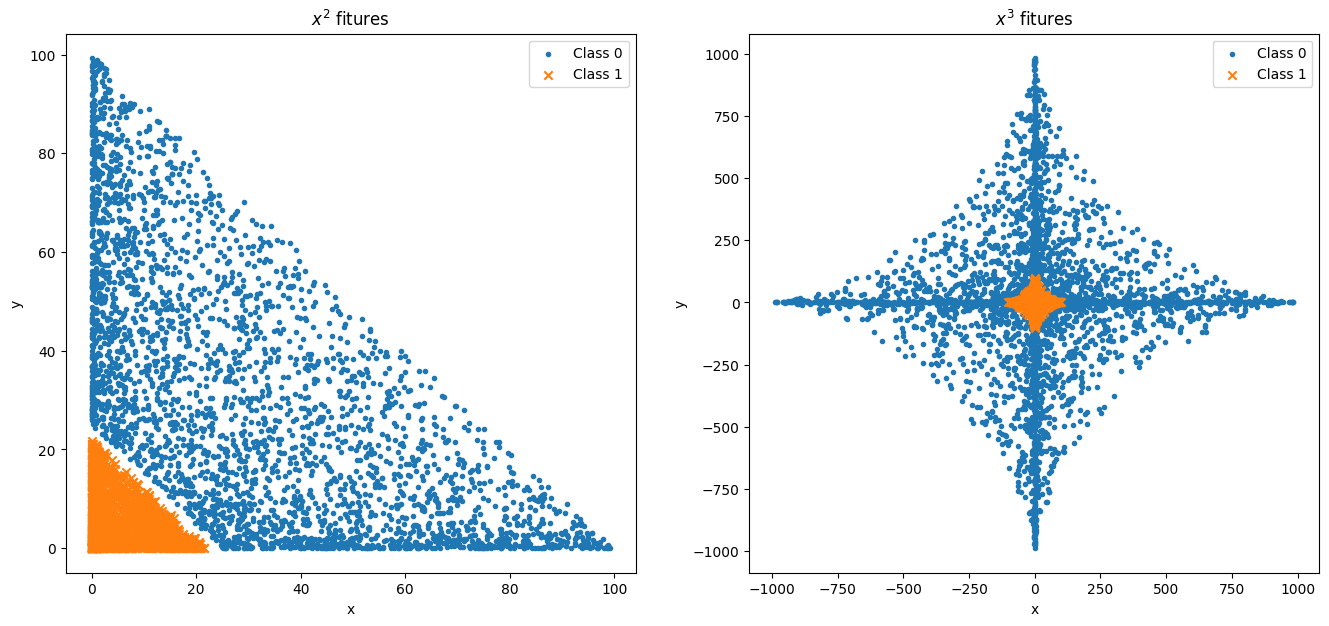

In [18]:
# Plot data
plt.figure(figsize=(25, 7))

plt.subplot(1, 3, 1)
plt.title("$x^2$ fitures")
plt.scatter(X2_class0[:, 0].cpu().numpy(), X2_class0[:, 1].cpu().numpy(), label="Class 0", marker='.')
plt.scatter(X2_class1[:, 0].cpu().numpy(), X2_class1[:, 1].cpu().numpy(), label="Class 1", marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


plt.subplot(1, 3, 2)
plt.title("$x^3$ fitures")
plt.scatter(X3_class0[:, 0].cpu().numpy(), X3_class0[:, 1].cpu().numpy(), label="Class 0", marker='.')
plt.scatter(X3_class1[:, 0].cpu().numpy(), X3_class1[:, 1].cpu().numpy(), label="Class 1", marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [13]:
# define single layer perceptron class using pytorch
class single_layer_perceptron(nn.Module):
    def __init__(self, input_size):
        super(single_layer_perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

In [14]:
# initialize parameters of model

X2_model = single_layer_perceptron(X2_train.size(1)).to(device) # create model
X3_model = single_layer_perceptron(X3_train.size(1)).to(device) # create model

epochs = 500

# define loss function and optimizer
criterion = nn.MSELoss() # unsing mean squared error for loss function
X2_optimizer = optim.SGD(X2_model.parameters(), lr=0.01) # using stochastic gradient descent for optimization
X3_optimizer = optim.SGD(X3_model.parameters(), lr=0.01) # using stochastic gradient descent for optimization

# convert labels to integer type
y_train = y_train.long()
y_test = y_test.long()
y_val = y_val.long()

X2_train_losses = []
X2_train_accuracies = []
X2_val_losses = []
X2_val_accuracies = []
X2_test_losses = []
X2_test_accuracies = []


X3_train_losses = []
X3_train_accuracies = []
X3_val_losses = []
X3_val_accuracies = []
X3_test_losses = []
X3_test_accuracies = []

In [ ]:
# train phase
for epoch in range(epochs):
    # forward pass
    X2_outputs = X2_model(X2_train)
    X2_loss = criterion(X2_outputs, y_train.float())

    # backward and optimize
    X2_optimizer.zero_grad()
    X2_loss.backward()
    X2_optimizer.step()

    # calculate accuracy
    X2_predicted = torch.round(X2_outputs.data)
    X2_correct = (X2_predicted == y_train).sum().item()
    X2_train_accuracy = X2_correct / y_train.size(0)
    X2_train_f1 = f1_score(y_train.cpu().numpy(), X2_predicted.cpu().numpy())

    # calculate loss and accuracy for validation set
    X2_val_outputs = X2_model(X2_val)
    X2_val_loss = criterion(X2_val_outputs, y_val.float())
    X2_val_predicted = torch.round(X2_val_outputs.data)
    X2_val_correct = (X2_val_predicted == y_val).sum().item()
    X2_val_accuracy = X2_val_correct / y_val.size(0)
    X2_val_f1 = f1_score(y_val.cpu().numpy(), X2_val_predicted.cpu().numpy())

    # store losses and accuracies
    X2_train_losses.append(X2_loss.item())
    X2_train_accuracies.append(X2_train_accuracy)
    X2_val_losses.append(X2_val_loss.item())
    X2_val_accuracies.append(X2_val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {X2_loss.item():.4f}, Accuracy: {X2_train_accuracy:.4f}, F1 Score: {X2_train_f1:.4f}")
print('-'*80)
print(f"Validation Loss: {sum(X2_val_losses) / len(X2_val_losses):.4f}, Validation Accuracy: {sum(X2_val_accuracies) / len(X2_val_accuracies):.4f}, Validation F1 Score: {X2_val_f1:.4f}")
print("-"*80)